# 2장 파이토치의 기본 기능

* "부록3 매트플롯립 입문"에서 한글 폰트를 올바르게 출력하기 위한 설치 방법을 설명했다. 설치 방법은 다음과 같다.

In [1]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no suc

In [2]:

# 필요 라이브러리 설치

!pip install torchviz | tail -n 1

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [3]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [4]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

## 2.2 텐서

### 라이브러리 임포트

In [5]:
# 파이토치 라이브러리

import torch

### 다양한 계수의 텐서 만들기

In [6]:
# 0계 텐서(스칼라)
r0 = torch.tensor(1.0).float()

# type 확인
print(type(r0))

# dtype 확인
print(r0.dtype)

<class 'torch.Tensor'>
torch.float32


In [7]:
# shape 확인
print(r0.shape)

# 데이터 확인
print(r0.data)

torch.Size([])
tensor(1.)


In [8]:
# 1계 텐서(벡터)

# 1계 넘파이 변수 작성
r1_np = np.array([1, 2, 3, 4, 5])
print(r1_np.shape)

# 넘파이에서 텐서로 변환
r1 = torch.tensor(r1_np).float()

# dtype 확인
print(r1.dtype)

# shape 확인
print(r1.shape)

# 데이터 확인
print(r1.data)

(5,)
torch.float32
torch.Size([5])
tensor([1., 2., 3., 4., 5.])


In [9]:
# 2계 텐서(행렬)

# 2계 넘파이 변수 작성
r2_np = np.array([[1, 5, 6], [4, 3, 2]])
print(r2_np.shape)

# 넘파이에서 텐서로 변환
r2 = torch.tensor(r2_np).float()

# shape 확인
print(r2.shape)

# 데이터 확인
print(r2.data)

(2, 3)
torch.Size([2, 3])
tensor([[1., 5., 6.],
        [4., 3., 2.]])


In [10]:
# ３계 텐서

# 난수 seed 초기화
torch.manual_seed(123)

# shape=[3,2,2]의 정규분포 텐서 작성
r3 = torch.randn((3, 2, 2))

# shape 확인
print(r3.shape)

# 데이터 확인
print(r3.data)

torch.Size([3, 2, 2])
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])


In [11]:
# 4계 텐서

# 요소가 모두 1인 shape=[2,3,2,2] 텐서 작성
r4 = torch.ones((2, 3, 2, 2))

# shape 확인
print(r4.shape)

# 데이터 확인
print(r4.data)

torch.Size([2, 3, 2, 2])
tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])


### 정숫값을 갖는 텐서 만들기

In [12]:
r5 = r1.long()

# dtype 확인
print(r5.dtype)

# 값 확인
print(r5)

torch.int64
tensor([1, 2, 3, 4, 5])


### view 함수

In [13]:
# 2계화
# 남은 자리에 -1을 지정하면 이 수를 자동으로 조정함

r6 = r3.view(3, -1)

# shape 확인
print(r6.shape)

# 값 확인
print(r6.data)

torch.Size([3, 4])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])


In [14]:
# 1계화
# 남은 자리에 -1을 지정하면 이 수를 자동으로 조정함

r7 = r3.view(-1)

# shape 확인
print(r7.shape)

# 값 확인
print(r7.data)

torch.Size([12])
tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
         0.3239, -0.1085,  0.2103, -0.3908])


### 그 밖의 속성

In [15]:
# requires_grad 속성
print('requires_grad: ', r1.requires_grad)

# device 속성
print('device: ', r1.device)

requires_grad:  False
device:  cpu


### item 함수

In [16]:
# 스칼라 텐서(0계 텐서)는 item 함수로 값을 꺼낼 수 있음

item = r0.item()

print(type(item))
print(item)

<class 'float'>
1.0


In [17]:
# 스칼라 이외의 텐서에 item 함수는 무효함

print(r1)

tensor([1., 2., 3., 4., 5.])


In [18]:
# 요소 수가 하나뿐인 1계 텐서는 OK
# (2계 이상에서도 마찬가지)
t1 = torch.ones(1)

# shape 확인
print(t1.shape)

# item 함수 호출
print(t1.item())

torch.Size([1])
1.0


### max 함수

In [19]:
# 텐서 r2 확인
print(r2)

# max 함수를 인수 없이 호출하면, 최댓값을 얻음
print(r2.max())

tensor([[1., 5., 6.],
        [4., 3., 2.]])
tensor(6.)


In [20]:
# torch.max 함수
# 두번째 인수는 기준이 되는 축을 의미함
print(torch.max(r2, 1))

torch.return_types.max(
values=tensor([6., 4.]),
indices=tensor([2, 0]))


In [21]:
# 몇 번째 요소가 최댓값인지 indices 확인을 통해 알 수 있음
# 아래 계산은 다중 분류에서 예측 라벨을 구할 때 자주 사용되는 패턴임
print(torch.max(r2, 1)[1])

tensor([2, 0])


### 넘파이 변수로 변환

In [22]:
# 넘파이로 변환
r2_np = r2.data.numpy()

# type 확인
print(type(r2_np))

# 값 확인
print(r2_np)

<class 'numpy.ndarray'>
[[1. 5. 6.]
 [4. 3. 2.]]


## 2.4 ２차 함수의 경사 계산

 ### 데이터 준비

In [23]:
# x를 넘파이 배열로 정의
x_np = np.arange(-2, 2.1, 0.25)

# x값 표시
print(x_np)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [24]:
# (1) 경사 계산용 변수 정의

x = torch.tensor(x_np, requires_grad=True,
    dtype=torch.float32)

# 결과 확인
print(x)

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)


### ２차 함수 계산

In [25]:
# 2차 함수의 계산
# 계산 그래프는 내부에서 자동 생성됨

y = 2 * x**2 + 2

$ y = 2x^2 + 2$를 의미한다.

In [26]:
# y의 계산 결과 확인

print(y)

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)


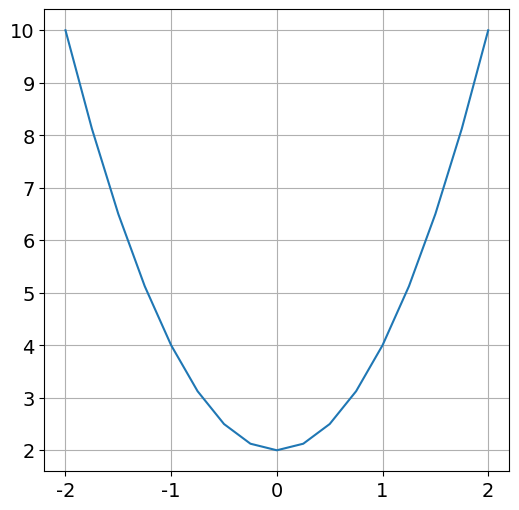

In [27]:
# 그래프(산포도) 출력

plt.plot(x.data, y.data)
plt.show()

In [28]:
# 경사 계산을 위해 최종 값은 스칼라일 필요가 있으므로, 더미로 sum 함수를 붙임

z = y.sum()

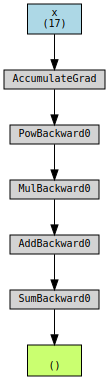

In [29]:
# (3) 계산 그래프 시각화

# 필요한 라이브러리 임포트
from torchviz import make_dot

# 시각화 함수 호출
g= make_dot(z, params={'x': x})
display(g)

In [30]:
# (4) 경사 계산

z.backward()

In [31]:
# (5) 경삿값 가져오기

print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])


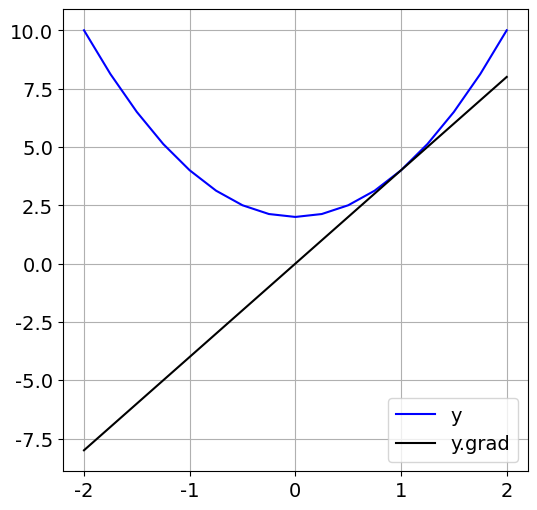

In [32]:
# 원래 함수와 경사 그래프

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()

원래 함수가 2차 함수이기 때문에 경사 계산의 결과가 직선인 것은 타당한 결과

경사 계산을 한번 더 해보자.

In [33]:
# 경사를 초기화하지 않고 두번째 경사를 계산

y = 2 * x**2 + 2
z = y.sum()
z.backward()

# x의 경사 확인
print(x.grad)

tensor([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
          8.,  10.,  12.,  14.,  16.])


경삿값은 경사 계산의 값이 점차 합해진 결과다. 새로운 값을 계산하기 위해서 경삿값을 조기화 해야한다.

In [34]:
# (6) 경삿값의 초기화는 zero_() 함수를 사용함

x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


## 2.5 시그모이드 함수의 경사 계산

시그모이드 함수는 수식으로 나타내면 다음과 같지만, 여기서는 파이토치에서 제공하는 함수를 사용한다.

$ y = \dfrac{1}{1 + \exp{(-x)}} $

In [35]:
# 시그모이드 함수의 정의

sigmoid = torch.nn.Sigmoid()

In [36]:
# (2) y값의 계산

y = sigmoid(x)

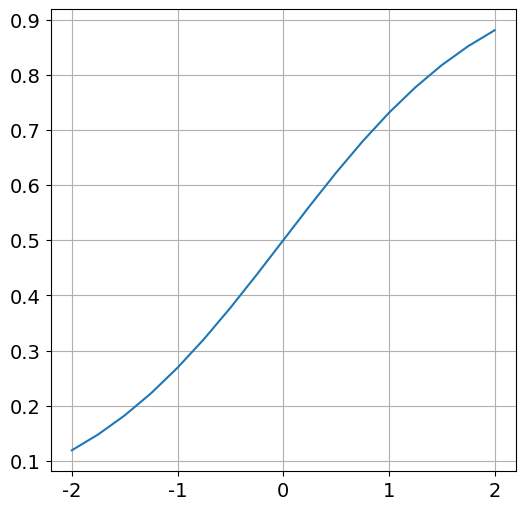

In [37]:
# 그래프(산포도) 출력

plt.plot(x.data, y.data)
plt.show()

In [38]:
# 경사 계산을 위해 최종 값은 스칼라일 필요가 있으므로, 더미로 sum 함수를 붙임

z = y.sum()

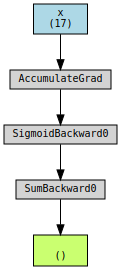

In [39]:
# (3) 계산 그래프 시각화

g = make_dot(z, params={'x': x})
display(g)

In [40]:
# (4) 경사 계산
z.backward()

# (5) 경삿값 확인
print(x.grad)

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])


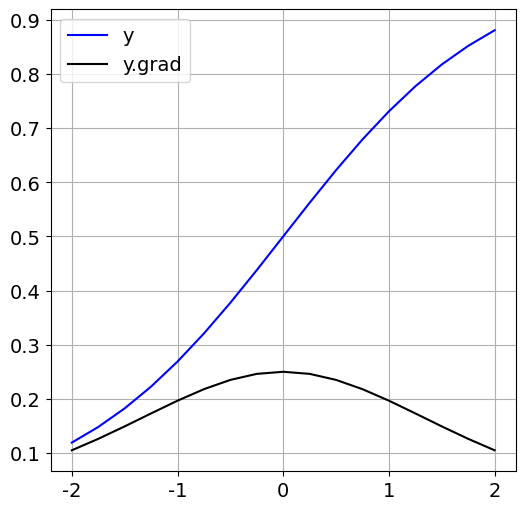

In [41]:
# 원래 함수와 경사 그래프

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()

시그모이드 함수의 경사는 $y(1-y)$ 이다.  
2차 함수이므로, $y=\dfrac{1}{2}$(x=0일때) 최댓값 $\dfrac{1}{4}$을 얻는다. 위의 그래프는 이 계산 결과와 일치한다.

In [42]:
# (6) 경사 초기화는 zero_() 함수를 사용

x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


### (참고) 시그모이드 함수를 직접 구현한 경우

In [43]:
# 시그모이드 함수의 정의

def sigmoid(x):
    return(1/(1 + torch.exp(-x)))

In [44]:
# (2) y값의 계산

y = sigmoid(x)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

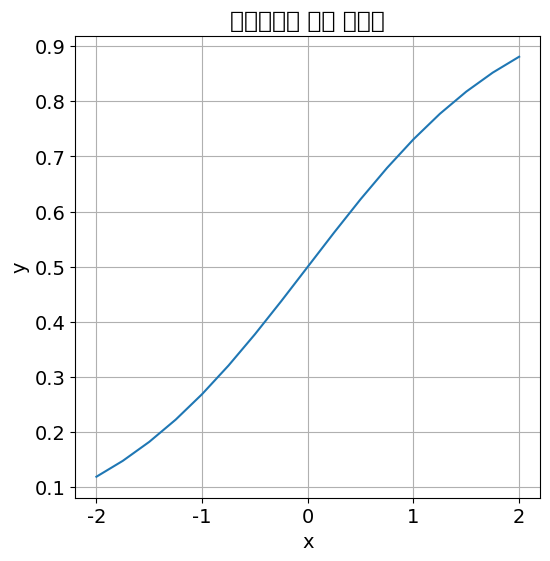

In [45]:
# 그래프(산포도) 출력

plt.plot(x.data, y.data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('시그모이드 함수 그래프')
plt.show()

In [46]:
# 경사 계산을 위해 최종 값은 스칼라일 필요가 있으므로, 더미로 sum 함수를 붙임

z = y.sum()

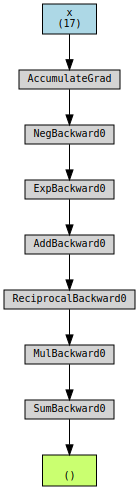

In [47]:
# (3) 계산 그래프 시각화

params = {'x': x}
g = make_dot(z, params=params)
display(g)

In [48]:
# (4) 경사 계산
z.backward()

# (5) 경삿값 확인
print(x.grad)

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])


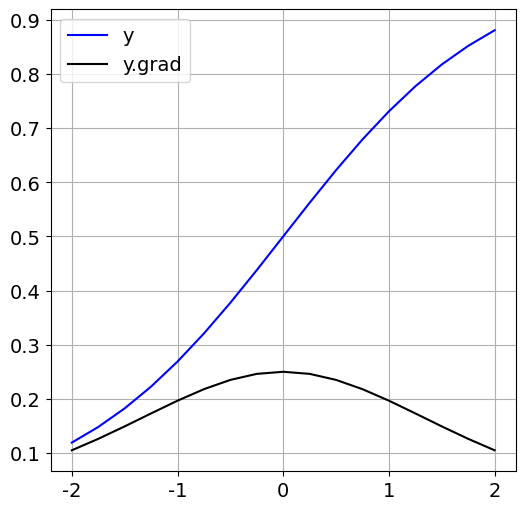

In [49]:
# 원래 함수와 경사 그래프

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()

In [49]:
# eos